In [1]:
# libraries

import nltk
import string
import random
from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer

from gensim.models import KeyedVectors
import gensim.downloader as api
import numpy as np
from nltk.tokenize import word_tokenize


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd


from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

from sklearn.metrics import precision_recall_fscore_support



from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression




In [4]:
medquad_data = pd.read_csv('medquad.csv')

2.Initial Data Understanding

In [5]:
medquad_data.head()

,question,answer,source,focus_area
0,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma
1,What causes Glaucoma ?,"Nearly 2.7 million people have glaucoma, a lea...",NIHSeniorHealth,Glaucoma
2,What are the symptoms of Glaucoma ?,Symptoms of Glaucoma Glaucoma can develop in ...,NIHSeniorHealth,Glaucoma
3,What are the treatments for Glaucoma ?,"Although open-angle glaucoma cannot be cured, ...",NIHSeniorHealth,Glaucoma
4,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma


In [6]:
display(medquad_data.shape)

(16412, 4)

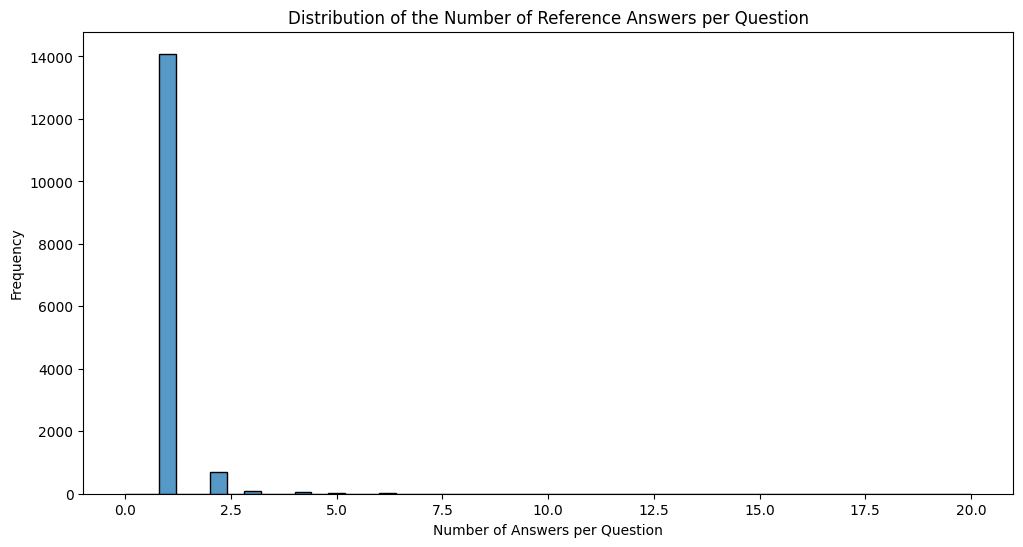

,answer
count,14984.000000
mean,1.094968
std,0.566234
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,20.000000


In [7]:
# Calculating the number of reference answers per question
num_answers_per_question = medquad_data.groupby('question')['answer'].count()

# Visualizing the distribution of the number of reference answers per question
plt.figure(figsize=(12, 6))
sns.histplot(num_answers_per_question, bins=50, kde=False)
plt.title('Distribution of the Number of Reference Answers per Question')
plt.xlabel('Number of Answers per Question')
plt.ylabel('Frequency')
plt.show()

num_answers_per_question.describe()  # Displaying statistical summary of the distribution



In [8]:
# Checking the unique labels in the 'focus_area' column
unique_labels = medquad_data['focus_area'].unique()
num_labels = len(unique_labels)

# Displaying the unique labels and their count
unique_labels, num_labels

# Visualizing the distribution of the labels
label_counts = medquad_data['focus_area'].value_counts()



In [ ]:
# plt.figure(figsize=(12, 8))
# sns.barplot(x=label_counts.values, y=label_counts.index)
# plt.title('Distribution of Labels (Focus Areas) in the Dataset')
# plt.xlabel('Count')
# plt.ylabel('Focus Area')
# plt.show()


In [9]:
# Converting categorical labels to numbers
label_encoder = LabelEncoder()
medquad_data['focus_area_numeric'] = label_encoder.fit_transform(medquad_data['focus_area'])

# Displaying the first few rows of the dataset with numeric labels
medquad_data[['question', 'focus_area', 'focus_area_numeric']].head()


,question,focus_area,focus_area_numeric
0,What is (are) Glaucoma ?,Glaucoma,1700
1,What causes Glaucoma ?,Glaucoma,1700
2,What are the symptoms of Glaucoma ?,Glaucoma,1700
3,What are the treatments for Glaucoma ?,Glaucoma,1700
4,What is (are) Glaucoma ?,Glaucoma,1700


In [10]:
# Extracting questions and answers
questions = medquad_data['question'].tolist()
answers = medquad_data['answer'].tolist()

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Tokenization,Lemmatization ,normalization
lemmer = nltk.stem.WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]

remove_punc_dict = dict((ord(punct), None) for punct in string.punctuation)
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punc_dict)))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [11]:
# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:

for i in range(1):
    original_q = questions[i]
    original_a = answers[i]

    # Tokenization
    tokenized_q = nltk.word_tokenize(original_q)
    tokenized_a = nltk.word_tokenize(original_a)

    # Applying LemTokens
    lemmatized_q = " ".join(LemTokens(tokenized_q))
    lemmatized_a = " ".join(LemTokens(tokenized_a))

    # Applying LemNormalize
    normalized_q = " ".join(LemNormalize(original_q))
    normalized_a = " ".join(LemNormalize(original_a))

    # Stopword Removal
    filtered_q = [word for word in tokenized_q if word.lower() not in stop_words]
    filtered_a = [word for word in tokenized_a if word.lower() not in stop_words]

    print(f"Original Question: {original_q}")
    print(f"Tokenized Question: {tokenized_q}")
    print(f"Lemmatized Question (LemTokens): {lemmatized_q}")
    print(f"Normalized Question (LemNormalize): {normalized_q}")
    print(f"Filtered Question (Stopword Removal): {filtered_q}\n")

    print(f"Original Answer: {original_a}")
    print(f"Tokenized Answer: {tokenized_a}")
    print(f"Lemmatized Answer (LemTokens): {lemmatized_a}")
    print(f"Normalized Answer (LemNormalize): {normalized_a}")
    print(f"Filtered Answer (Stopword Removal): {filtered_a}\n")

Original Question: What is (are) Glaucoma ?
Tokenized Question: ['What', 'is', '(', 'are', ')', 'Glaucoma', '?']
Lemmatized Question (LemTokens): What is ( are ) Glaucoma ?
Normalized Question (LemNormalize): what is are glaucoma
Filtered Question (Stopword Removal): ['(', ')', 'Glaucoma', '?']

Original Answer: Glaucoma is a group of diseases that can damage the eye's optic nerve and result in vision loss and blindness. While glaucoma can strike anyone, the risk is much greater for people over 60. How Glaucoma Develops  There are several different types of glaucoma. Most of these involve the drainage system within the eye. At the front of the eye there is a small space called the anterior chamber. A clear fluid flows through this chamber and bathes and nourishes the nearby tissues. (Watch the video to learn more about glaucoma. To enlarge the video, click the brackets in the lower right-hand corner. To reduce the video, press the Escape (Esc) button on your keyboard.) In glaucoma, for

In [13]:
# Response Generation by the Bot useing TF-IDF
'''
The response function takes user_response as input.
It uses TF-IDF to vectorize the questions and the user's input.
Cosine similarity is computed between the user's input and all questions.
The question most similar to the user's input (based on cosine similarity) is found.
The bot responds with the answer corresponding to the most similar question.'''

def response(user_response):
    robo_response = ''
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
    tfidf = TfidfVec.fit_transform(questions + [user_response])
    vals = cosine_similarity(tfidf[-1], tfidf)
    idx = vals.argsort()[0][-2]
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-2]
    if req_tfidf == 0:
        robo_response = "I am sorry. Unable to understand you!"
        return robo_response
    else:
        robo_response = answers[idx]
        return robo_response

# Print the TF-IDF matrix and feature names
TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
tfidf_matrix = TfidfVec.fit_transform(questions)
feature_names = TfidfVec.get_feature_names_out()

print("TF-IDF Matrix:\n", tfidf_matrix.toarray())
print("Feature Names:\n", feature_names)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


TF-IDF Matrix:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Feature Names:
 ['0' '1' '10' ... 'zoster' 'zunich' 'zygomatic']


### 2- Bag of Words

In [14]:

# Extract the 'question' column as a list
text_data = medquad_data['question'].tolist()

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer to the questions to build the vocabulary
vectorizer.fit(text_data)

# Transform the questions into a Bag of Words representation
bow_model = vectorizer.transform(text_data)

# Output the Bag of Words matrix
print(bow_model)

  (0, 392)	1
  (0, 1723)	1
  (0, 2215)	1
  (0, 4564)	1
  (1, 747)	1
  (1, 1723)	1
  (1, 4564)	1
  (2, 392)	1
  (2, 1723)	1
  (2, 3090)	1
  (2, 4112)	1
  (2, 4206)	1
  (2, 4564)	1
  (3, 392)	1
  (3, 1592)	1
  (3, 1723)	1
  (3, 4206)	1
  (3, 4318)	1
  (3, 4564)	1
  (4, 392)	1
  (4, 1723)	1
  (4, 2215)	1
  (4, 4564)	1
  (5, 392)	1
  (5, 1723)	1
  :	:
  (16409, 3090)	1
  (16409, 4206)	1
  (16409, 4258)	1
  (16410, 392)	1
  (16410, 1091)	1
  (16410, 1181)	1
  (16410, 1182)	1
  (16410, 1592)	1
  (16410, 2962)	1
  (16410, 2995)	1
  (16410, 3090)	1
  (16410, 4206)	2
  (16410, 4318)	1
  (16410, 4564)	1
  (16411, 1091)	1
  (16411, 1181)	1
  (16411, 1182)	1
  (16411, 1243)	1
  (16411, 1592)	1
  (16411, 2962)	1
  (16411, 2995)	1
  (16411, 3090)	1
  (16411, 4206)	1
  (16411, 4258)	1
  (16411, 4564)	1


### 3- Word Embeddings


In [16]:
#  Install Gensim:
!pip install gensim

In [17]:

model = api.load('glove-wiki-gigaword-50')  # smaller model for demonstration

# Example text data
text_data = ["What is Glaucoma?", "What causes Glaucoma?", "What are the symptoms of Glaucoma?"]

# Process text data to get embeddings
processed_data = []
for question in text_data:
    tokenized_question = word_tokenize(question)
    question_embeddings = [model[word] for word in tokenized_question if word in model]
    if question_embeddings:
        # Averaging the word embeddings for each question
        avg_embedding = np.mean(question_embeddings, axis=0)
        processed_data.append(avg_embedding)

# Print the processed data (average embeddings for each question)
for i, embedding in enumerate(processed_data):
    print(f"Question {i+1}: {text_data[i]}")
    print(f"Average Embedding: {embedding}\n")




[==================================================] 100.0% 66.0/66.0MB downloaded
Question 1: What is Glaucoma?
Average Embedding: [ 0.23636     0.573565   -0.2089975  -0.04446501  0.595435    0.18483499
 -0.20055805 -0.499      -0.07567501  0.19669999 -0.096525    0.445625
 -0.25613448 -0.17215274  0.76432     0.55493     0.456495    0.48823
 -0.08011815 -0.235405   -0.58788     0.03782     0.283073    0.45153
  0.351825   -2.0533     -0.94665504  0.49898     0.776923   -0.508677
  3.3137002  -0.13578    -0.497205   -0.22525999 -0.1485275  -0.23476
  0.12729     0.072524    0.43247    -0.32975    -0.14441651  0.23115
 -0.10849999  0.3431845  -0.13431     0.21119    -0.0827305  -0.34512502
  0.209765    0.826535  ]

Question 2: What causes Glaucoma?
Average Embedding: [ 5.15460014e-01  5.16899943e-01  2.28399504e-02 -3.25444996e-01
  5.35999984e-02  8.94789994e-01  1.99015006e-01 -1.29855007e-01
  2.46609986e-01  3.10429990e-01 -1.24695003e-01  3.24276507e-01
 -8.53649974e-02 -7.05327

## Task 5 –Text Classification / Prediction

## 1. Naive Bayes

In [32]:
### Naive Bayes
# Extracting questions and focus areas
questions = medquad_data['question'].tolist()
focus_areas = medquad_data['focus_area'].tolist()

# Using a subset of data to reduce memory usage
subset_size = 5000
subset_questions = questions[:subset_size]
subset_focus_areas = focus_areas[:subset_size]

# Truncate questions to a maximum length
max_length = 200  # Max number of words in a question
truncated_questions = [' '.join(q.split()[:max_length]) for q in subset_questions]

# Vectorize the truncated questions with fewer features
vectorizer = TfidfVectorizer(max_features=1000)  # Reduced number of features
X = vectorizer.fit_transform(truncated_questions).astype(np.float32)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, np.array(subset_focus_areas), test_size=0.2, random_state=42)

# Train the Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)


MultinomialNB()

In [33]:
print(np.isnan(X.data).sum())

0


In [37]:
print(pd.Series(y.flatten()).isna().sum())  # Flatten y to make it 1D


0


In [38]:
print(X.shape)
print(y.shape)


(5000, 1000)
(16412, 1)


In [45]:
# Convert focus areas to a NumPy array and reshape to (5000, 1)
y = np.array(subset_focus_areas).reshape(-1, 1)  # Reshape y to be (5000, 1)

# Check for missing values in y
print("Missing values in y:", pd.Series(y.flatten()).isna().sum())  # Flatten y to make it 1D before checking

# Define the random seed for reproducibility
SEED = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)


print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)



Missing values in y: 0
X_train shape: (4000, 1000)
y_train shape: (4000, 1)
X_test shape: (1000, 1000)
y_test shape: (1000, 1)


In [46]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


# Convert sparse matrices to dense arrays
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

gnb = GaussianNB()
%time gnb.fit(X_train_dense, y_train)

y_pred_train = gnb.predict(X_train_dense)
y_pred_test = gnb.predict(X_test_dense)
print("\nTraining Accuracy score:", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:", accuracy_score(y_test, y_pred_test))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 298 ms, sys: 15.8 ms, total: 314 ms
Wall time: 322 ms

Training Accuracy score: 0.806
Testing Accuracy score: 0.573


In [47]:
# Evaluation
print(classification_report(y_test, y_pred_test))


                                                                                      precision    recall  f1-score   support

                                                      15q13.3 microdeletion syndrome       1.00      1.00      1.00         1
                                                     17-alpha-hydroxylase deficiency       0.00      0.00      0.00         1
                                   17-beta hydroxysteroid dehydrogenase 3 deficiency       0.00      0.00      0.00         0
                                                  2-methyl-3-hydroxybutyric aciduria       0.00      0.00      0.00         0
                                                           22q13.3 deletion syndrome       1.00      1.00      1.00         1
                                                  3 methylglutaconic aciduria type V       0.00      0.00      0.00         1
                                        46,XX testicular disorder of sex development       1.00      1.00      1.00  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [50]:
y_pred_test = clf.predict(X_test)


In [51]:
from sklearn.metrics import confusion_matrix
import pandas as pd

cm = confusion_matrix(y_test, y_pred_test)


cm_matrix = pd.DataFrame(data=cm,
                         columns=[f'Actual {i}' for i in range(cm.shape[1])],
                         index=[f'Predict {i}' for i in range(cm.shape[0])])

print('Confusion matrix\n', cm_matrix)


Confusion matrix
              Actual 0  Actual 1  Actual 2  Actual 3  Actual 4  Actual 5  \
Predict 0           0         0         0         0         0         0   
Predict 1           0         0         0         0         0         0   
Predict 2           0         0         0         0         0         0   
Predict 3           0         0         0         0         0         0   
Predict 4           0         0         0         0         0         0   
...               ...       ...       ...       ...       ...       ...   
Predict 698         0         0         0         0         0         0   
Predict 699         0         0         0         0         0         0   
Predict 700         0         0         0         0         0         0   
Predict 701         0         0         0         0         0         0   
Predict 702         0         0         0         0         0         0   

             Actual 6  Actual 7  Actual 8  Actual 9  ...  Actual 693  \
Predict 0

## 2.GRU Model

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense
import numpy as np
from sklearn.metrics import classification_report

# Data Preparation
questions = medquad_data['question'].tolist()
focus_areas = medquad_data['focus_area'].tolist()

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(questions)
sequences = tokenizer.texts_to_sequences(questions)

max_sequence_length = 200
X = pad_sequences(sequences, maxlen=max_sequence_length)

encoder = LabelEncoder()
y = encoder.fit_transform(focus_areas)

# Splitting the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the GRU Model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_sequence_length))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(len(np.unique(y)), activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the Model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# Generating predictions on the test set
y_pred_test = model.predict(X_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)  # Get the predicted class indices

# Generating the classification report
print(classification_report(y_test, y_pred_test_classes))


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


370/370 ━━━━━━━━━━━━━━━━━━━━ 129s 339ms/step - accuracy: 0.0041 - loss: 8592561.0000 - val_accuracy: 0.0076 - val_loss: 8.0677
Epoch 2/5
370/370 ━━━━━━━━━━━━━━━━━━━━ 139s 330ms/step - accuracy: 0.0096 - loss: 46915311894528.0000 - val_accuracy: 0.0175 - val_loss: 7.6186
Epoch 3/5
370/370 ━━━━━━━━━━━━━━━━━━━━ 124s 336ms/step - accuracy: 0.0307 - loss: 6.9083 - val_accuracy: 0.0228 - val_loss: 7.2460
Epoch 4/5
370/370 ━━━━━━━━━━━━━━━━━━━━ 143s 339ms/step - accuracy: 0.0599 - loss: 6.2934 - val_accuracy: 0.0579 - val_loss: 6.8854
Epoch 5/5
370/370 ━━━━━━━━━━━━━━━━━━━━ 140s 334ms/step - accuracy: 0.1124 - loss: 5.7046 - val_accuracy: 0.0937 - val_loss: 6.5331
103/103 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1
          10       0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

## 3.Logistic Regression Classifier

In [59]:
lr = LogisticRegression(random_state=SEED)
%time lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


CPU times: user 8min 51s, sys: 1min 16s, total: 10min 8s
Wall time: 6min 52s

Training Accuracy score: 0.12636148983167034
Testing Accuracy score: 0.07340846786475784


In [60]:
# Evaluation
print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         0
           8       0.50      1.00      0.67         1
          11       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         0
          26       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         3
          31       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         2
          35       0.00      0.00      0.00         1
          36       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

# Task 6 – Evaluation , Inferences, Recommendation and Reflection

In [61]:
# 1. Naive Bayes
vectorizer = TfidfVectorizer(max_features=1000)
X_nb = vectorizer.fit_transform(questions).astype(np.float32)
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_nb, np.array(focus_areas), test_size=0.2, random_state=42)

clf_nb = MultinomialNB()
clf_nb.fit(X_train_nb, y_train_nb)
y_pred_nb = clf_nb.predict(X_test_nb)

# Evaluate Naive Bayes
print("Naive Bayes:")
print(classification_report(y_test, y_pred_test))



Naive Bayes:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         0
           8       0.50      1.00      0.67         1
          11       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         0
          26       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         3
          31       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         2
          35       0.00      0.00      0.00         1
          36  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [62]:
# Evaluating the GRU Model

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")


103/103 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.1031 - loss: 6.5514
Test Accuracy: 0.1035638153553009


In [63]:

# 3. Logistic Regression Classifier
X_lr = vectorizer.fit_transform(questions).astype(np.float32)
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, np.array(focus_areas), test_size=0.2, random_state=42)

clf_lr = LogisticRegression(random_state=42)
clf_lr.fit(X_train_lr, y_train_lr)
y_pred_lr = clf_lr.predict(X_test_lr)

# Evaluate Logistic Regression Classifier
print("\nLogistic Regression Classifier:")
print(classification_report(y_test_lr, y_pred_lr))


Logistic Regression Classifier:
                                                                                                                                          precision    recall  f1-score   support

                                                                                                                   15q11.2 microdeletion       0.00      0.00      0.00         1
                                                                                                                   15q13.3 microdeletion       0.00      0.00      0.00         0
                                                                                                                     15q24 microdeletion       0.00      0.00      0.00         2
                                                                                             17 alpha-hydroxylase/17,20-lyase deficiency       1.00      1.00      1.00         1
                                                                            

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

## Task 6 – Evaluation , Inferences, Recommendation and Reflection


# Defining the Chat Flow

In [64]:
''' The code calculates the cosine similarity between
the TF-IDF vectors of the user's
input and the questions in the dataset'''

# Defining the Chat Flow
flag = True
print('Hello! I am the Medical Learning Bot. Ask me a medical question.')
while flag:
    user_response = input().lower()
    if user_response in ['bye', 'exit', 'quit']:
        flag = False
        print('Dr.AnswerBot: Goodbye!')
    elif user_response in ['hi', 'hello', 'hey']:
        print('Dr.AnswerBot: Hello! Please ask a medical question.')
    else:
        print('Dr.AnswerBot: ', end='')
        print(response(user_response))


Hello! I am the Medical Learning Bot. Ask me a medical question.
What are the treatments for Nonalcoholic Steatohepatitis ?
Dr.AnswerBot: 

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


Currently, no specific therapies for NASH exist. The most important recommendations given to persons with this disease are to
                
- reduce their weight (if obese or overweight)  - follow a balanced and healthy diet  - increase physical activity  - avoid alcohol  - avoid unnecessary medications
                
These are standard recommendations, but they can make a difference. They are also helpful for other conditions, such as heart disease, diabetes, and high cholesterol.
                
A major attempt should be made to lower body weight into the healthy range. Weight loss can improve liver tests in patients with NASH and may reverse the disease to some extent. Research at present is focusing on how much weight loss improves the liver in patients with NASH and whether this improvement lasts over a period of time.
                
People with NASH often have other medical conditions, such as diabetes, high blood pressure, or elevated cholesterol. These conditions should

KeyboardInterrupt: Interrupted by user